# Import Package

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors

#Load Dataset

In [ ]:
df_books = pd.read_csv('/content/drive/MyDrive/Project/Narasio Project system recomendation/Recommendation System/Books.csv')
df_ratings = pd.read_csv('/content/drive/MyDrive/Project/Narasio Project system recomendation/Recommendation System/Ratings.csv')
df_users = pd.read_csv('/content/drive/MyDrive/Project/Narasio Project system recomendation/Recommendation System/Users.csv')

#Preparation

## Books

In [ ]:
#memeriksa data set books
df_books

ISBN  ...                                        Image-URL-L
0       0195153448  ...  http://images.amazon.com/images/P/0195153448.0...
1       0002005018  ...  http://images.amazon.com/images/P/0002005018.0...
2       0060973129  ...  http://images.amazon.com/images/P/0060973129.0...
3       0374157065  ...  http://images.amazon.com/images/P/0374157065.0...
4       0393045218  ...  http://images.amazon.com/images/P/0393045218.0...
...            ...  ...                                                ...
271355  0440400988  ...  http://images.amazon.com/images/P/0440400988.0...
271356  0525447644  ...  http://images.amazon.com/images/P/0525447644.0...
271357  006008667X  ...  http://images.amazon.com/images/P/006008667X.0...
271358  0192126040  ...  http://images.amazon.com/images/P/0192126040.0...
271359  0767409752  ...  http://images.amazon.com/images/P/0767409752.0...

[271360 rows x 8 columns]

colom yang tidak akan digunakan adalah image-url-s,image-url-m dan image-url-l

In [ ]:
df_books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
#drop kolom yang tidak diperlukan
df_books = df_books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1)
df_books

ISBN  ...                                         Publisher
0       0195153448  ...                           Oxford University Press
1       0002005018  ...                             HarperFlamingo Canada
2       0060973129  ...                                   HarperPerennial
3       0374157065  ...                              Farrar Straus Giroux
4       0393045218  ...                        W. W. Norton &amp; Company
...            ...  ...                                               ...
271355  0440400988  ...                   Random House Childrens Pub (Mm)
271356  0525447644  ...                                      Dutton Books
271357  006008667X  ...                                HarperSanFrancisco
271358  0192126040  ...                           Oxford University Press
271359  0767409752  ...  McGraw-Hill Humanities/Social Sciences/Languages

[271360 rows x 5 columns]

In [ ]:
#periksa info
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


terdapat keanehan pada type pada kolom year-of-publication, dimana tipe data seharusya berupa integer

In [ ]:
#periksa data unik tiap kolom
for col in df_books.columns :
  print('=='*50)
  print(col,df_books[col].unique())

ISBN ['0195153448' '0002005018' '0060973129' ... '006008667X' '0192126040'
 '0767409752']
Book-Title ['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks to the Dead'
 "Republic (World's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"]
Book-Author ['Mark P. O. Morford' 'Richard Bruce Wright' "Carlo D'Este" ...
 'David Biggs' 'Teri Sloat' 'Christopher  Biffle']
Year-Of-Publication [2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1

dari kolom year-of-publication terdapat kesalahan penulisan tahun dimana terdapat 0,DK Publishing Inc, dan Gallimard

In [ ]:
df_books[df_books['Year-Of-Publication']=='DK Publishing Inc']

ISBN  ...                                          Publisher
209538  078946697X  ...  http://images.amazon.com/images/P/078946697X.0...
221678  0789466953  ...  http://images.amazon.com/images/P/0789466953.0...

[2 rows x 5 columns]

In [ ]:
df_books[df_books['Year-Of-Publication']=='Gallimard']

ISBN  ...                                          Publisher
220731  2070426769  ...  http://images.amazon.com/images/P/2070426769.0...

[1 rows x 5 columns]

In [ ]:
#perbaikan ISBN 078946697X
df_books.loc[df_books['ISBN'] == '078946697X','Year-Of-Publication'] = 2000
df_books.loc[df_books['ISBN'] == '078946697X','Book-Author'] = "Michael Teitelbaum"
df_books.loc[df_books['ISBN'] == '078946697X','Publisher'] = "DK Publishing Inc"
df_books.loc[df_books['ISBN'] == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#perbaikan ISBN 0789466953
df_books.loc[df_books['ISBN'] == '0789466953','Year-Of-Publication'] = 2000
df_books.loc[df_books['ISBN'] == '0789466953','Book-Author'] = "James Buckley"
df_books.loc[df_books['ISBN'] == '0789466953','Publisher'] = "DK Publishing Inc"
df_books.loc[df_books['ISBN']== '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#perbaikan ISBN 2070426769
df_books.loc[df_books['ISBN'] == '2070426769','Year-Of-Publication'] = 2003
df_books.loc[df_books['ISBN'] == '2070426769','Book-Author'] = "Gallimard"
df_books.loc[df_books['ISBN'] == '2070426769','Publisher'] = "DK Publishing Inc"
df_books.loc[df_books['ISBN'] == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"

In [ ]:
#periksa data
df_books[(df_books['ISBN'] == '078946697X') | (df_books['ISBN'] == '0789466953') | (df_books['ISBN'] == '2070426769')]

ISBN  ...          Publisher
209538  078946697X  ...  DK Publishing Inc
220731  2070426769  ...  DK Publishing Inc
221678  0789466953  ...  DK Publishing Inc

[3 rows x 5 columns]

data telah dibersihkan, selanjut akan diperikan year-of-publication yang '0'

In [ ]:
#mengubah '0' dan 0 menjadi NaN
df_books.loc[(df_books['Year-Of-Publication'] == '0') | (df_books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

#imputasi dengan median
df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].fillna(df_books['Year-Of-Publication'].median()) 

In [ ]:
#periksa data year-of-publication '0'
df_books[(df_books['Year-Of-Publication']==0)]

Empty DataFrame
Columns: [ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher]
Index: []

year-of-publication telah berhasil di cleaning

In [ ]:
#konversi type year of publication menjadi integer
df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].astype('int')

#periksa kembali info data
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  int64 
 4   Publisher            271358 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB


data untuk book-author memiliki 1 missing value dan publisher juga memiliki 2 kolom yang missing, missing value akan dianggap sebagai unkown untuk book author dan juga publisher

In [ ]:
#handle missing value
df_books['Book-Author'] = df_books['Book-Author'].fillna('unknown')
df_books['Publisher'] = df_books['Publisher'].fillna('unknown')

#cek kembali missing value
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

missing value telah berhasil di cleaning

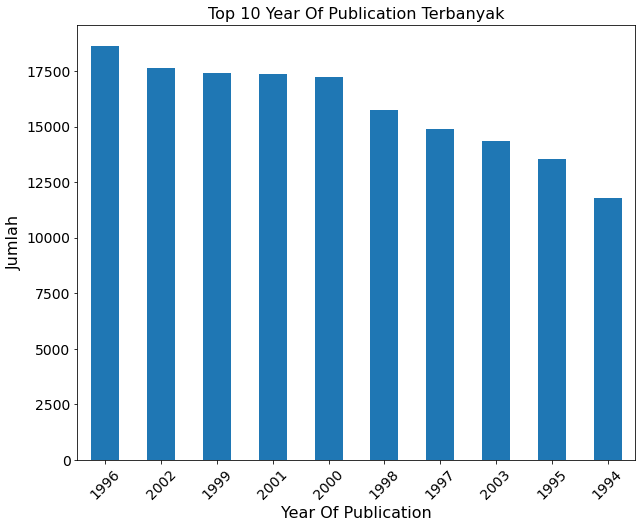

In [ ]:
#top 10 Year of publication jumlah terbitan terbanyak
plt.figure(figsize=(10,8))
df_books['Year-Of-Publication'].value_counts().iloc[:10].plot(kind='bar')
plt.title('Top 10 Year Of Publication Terbanyak',fontsize=16)
plt.xlabel('Year Of Publication',fontsize=16)
plt.xticks(rotation=45,fontsize=14)
plt.ylabel('Jumlah',fontsize=16)
plt.yticks(fontsize=14)
plt.show()

Year of publication terbanyak terdapat pada tahun 1996 disusul tahun 2002

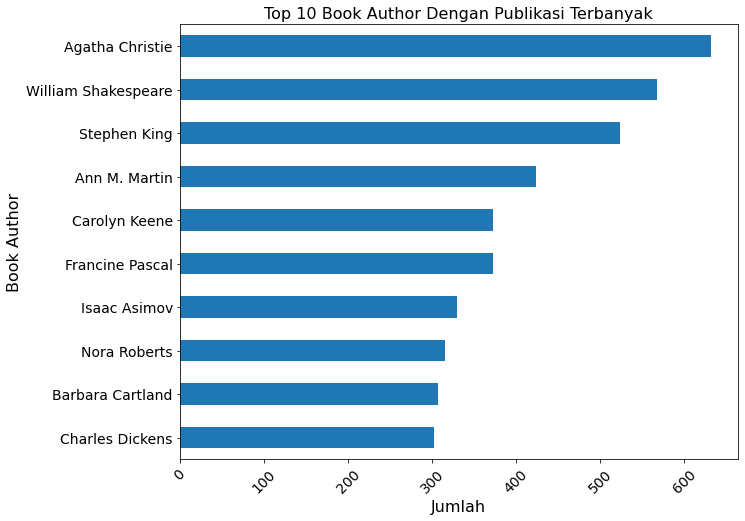

In [ ]:
#top 10 penulis yang julah terbitan terbanyak
plt.figure(figsize=(10,8))
df_books['Book-Author'].value_counts().iloc[:10].sort_values(ascending=True).plot(kind='barh')
plt.title('Top 10 Book Author Dengan Publikasi Terbanyak',fontsize=16)
plt.xlabel('Jumlah',fontsize=16)
plt.xticks(rotation=45,fontsize=14)
plt.ylabel('Book Author',fontsize=16)
plt.yticks(fontsize=14)
plt.show()

Agathe Cristie merupakan Book Autho dengan publikasi terbanyak disusul William Shakespeare

## Ratings

In [ ]:
#periksa dataset ratings
df_ratings

User-ID         ISBN  Book-Rating
0         276725   034545104X            0
1         276726   0155061224            5
2         276727   0446520802            0
3         276729   052165615X            3
4         276729   0521795028            6
...          ...          ...          ...
1149775   276704   1563526298            9
1149776   276706   0679447156            0
1149777   276709   0515107662           10
1149778   276721   0590442449           10
1149779   276723  05162443314            8

[1149780 rows x 3 columns]

In [ ]:
#check info data set
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


type pada masing masing data telah sesuai dan semua kolom akan digunakan

In [ ]:
for col in df_ratings.columns :
  print('=='*50)
  print(col,df_ratings[col].unique())

User-ID [276725 276726 276727 ... 276709 276721 276723]
ISBN ['034545104X' '0155061224' '0446520802' ... '0679752714' '0806917695'
 '05162443314']
Book-Rating [ 0  5  3  6  8  7 10  9  4  1  2]


tidak ada keanehan pada tiap kolom sehingga cleaning telah selesai

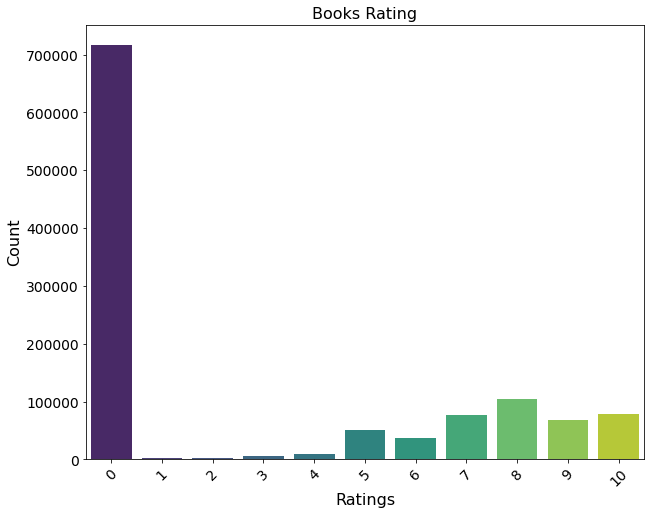

In [ ]:
#visulasi book-rating
plt.figure(figsize=(10,8))
sns.countplot(df_ratings['Book-Rating'], palette='viridis')
plt.title('Books Rating',fontsize=16)
plt.xlabel('Ratings',fontsize=16)
plt.xticks(rotation=45,fontsize=14)
plt.ylabel('Count',fontsize=16)
plt.yticks(fontsize=14)
plt.show()

sangat banyak buku yang mendapat rating 0

## Users

In [ ]:
#periksa kolom users
df_users

User-ID                            Location   Age
0             1                  nyc, new york, usa   NaN
1             2           stockton, california, usa  18.0
2             3     moscow, yukon territory, russia   NaN
3             4           porto, v.n.gaia, portugal  17.0
4             5  farnborough, hants, united kingdom   NaN
...         ...                                 ...   ...
278853   278854               portland, oregon, usa   NaN
278854   278855  tacoma, washington, united kingdom  50.0
278855   278856           brampton, ontario, canada   NaN
278856   278857           knoxville, tennessee, usa   NaN
278857   278858                dublin, n/a, ireland   NaN

[278858 rows x 3 columns]

In [ ]:
#periksa info tiap kolom
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


tipe data sesuai untuk tiap kolom

In [ ]:
#periksa unik tiap kolom
for col in df_users.columns :
  print('=='*50)
  print(col,df_users[col].unique())

User-ID [     1      2      3 ... 278856 278857 278858]
Location ['nyc, new york, usa' 'stockton, california, usa'
 'moscow, yukon territory, russia' ... 'sergnano, lombardia, italy'
 'stranraer, n/a, united kingdom' 'tacoma, washington, united kingdom']
Age [ nan  18.  17.  61.  26.  14.  25.  19.  46.  55.  32.  24.  20.  34.
  23.  51.  31.  21.  44.  30.  57.  43.  37.  41.  54.  42.  50.  39.
  53.  47.  36.  28.  35.  13.  58.  49.  38.  45.  62.  63.  27.  33.
  29.  66.  40.  15.  60.   0.  79.  22.  16.  65.  59.  48.  72.  56.
  67.   1.  80.  52.  69.  71.  73.  78.   9.  64. 103. 104.  12.  74.
  75. 231.   3.  76.  83.  68. 119.  11.  77.   2.  70.  93.   8.   7.
   4.  81. 114. 230. 239.  10.   5. 148. 151.   6. 101. 201.  96.  84.
  82.  90. 123. 244. 133.  91. 128.  94.  85. 141. 110.  97. 219.  86.
 124.  92. 175. 172. 209. 212. 237.  87. 162. 100. 156. 136.  95.  89.
 106.  99. 108. 210.  88. 199. 147. 168. 132. 159. 186. 152. 102. 116.
 200. 115. 226. 137. 207. 229. 

terdapata banyak keanehan nilai dari kolom age dimana terdapat age yang lebih dari 100 hal ini tidak masuk akal, sehingga kolom age akan didrop

In [ ]:
#drop kolom age
df_users.drop(['Age'],axis=1,inplace=True)

df_users

User-ID                            Location
0             1                  nyc, new york, usa
1             2           stockton, california, usa
2             3     moscow, yukon territory, russia
3             4           porto, v.n.gaia, portugal
4             5  farnborough, hants, united kingdom
...         ...                                 ...
278853   278854               portland, oregon, usa
278854   278855  tacoma, washington, united kingdom
278855   278856           brampton, ontario, canada
278856   278857           knoxville, tennessee, usa
278857   278858                dublin, n/a, ireland

[278858 rows x 2 columns]

In [ ]:
#split kota,privinsi dan negara
df_users[['City','Province','Country']]=df_users['Location'].apply(lambda x: pd.Series(str(x).split(",")[:3]))

#drop location
df_users.drop('Location',axis=1,inplace=True)

#show data
df_users.head()

User-ID         City          Province          Country
0        1          nyc          new york              usa
1        2     stockton        california              usa
2        3       moscow   yukon territory           russia
3        4        porto          v.n.gaia         portugal
4        5  farnborough             hants   united kingdom

proses cleaning data pada users selesai

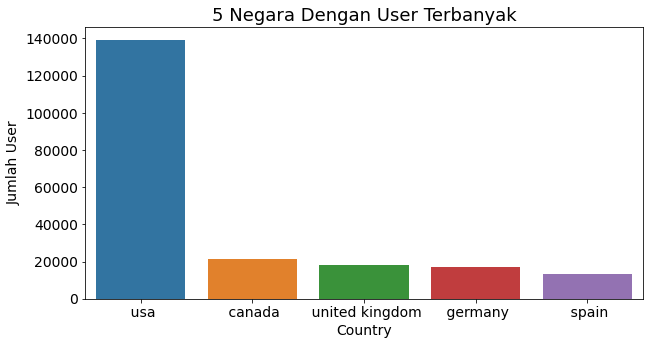

In [ ]:
my_dict=(df_users['Country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(5)
fig=plt.figure(figsize=(10,5))
ax = sns.barplot(y = 'count',x= 'c' , data = f)
plt.xlabel("Country", size=14)
plt.xticks(fontsize=14)
plt.ylabel("Jumlah User", size=14)
plt.yticks(fontsize=14)
plt.title("5 Negara Dengan User Terbanyak", size=18)
plt.show()

Negara USA memiliki user terbanyak disusul dengan negara canada

# Gabung Dataset

In [ ]:
#gabungkan kolom user dengan ratings
filter1 = df_ratings[df_ratings["User-ID"].isin(df_users["User-ID"])] 
df_1=filter1[filter1["ISBN"].isin(df_books["ISBN"])] 
df=pd.merge(df_users,df_1,on='User-ID')
df

User-ID      City     Province  Country        ISBN  Book-Rating
0              2  stockton   california      usa  0195153448            0
1              8   timmins      ontario   canada  0002005018            5
2              8   timmins      ontario   canada  0060973129            0
3              8   timmins      ontario   canada  0374157065            0
4              8   timmins      ontario   canada  0393045218            0
...          ...       ...          ...      ...         ...          ...
1031131   278854  portland       oregon      usa  0425163393            7
1031132   278854  portland       oregon      usa  0515087122            0
1031133   278854  portland       oregon      usa  0553275739            6
1031134   278854  portland       oregon      usa  0553578596            0
1031135   278854  portland       oregon      usa  0553579606            8

[1031136 rows x 6 columns]

In [ ]:
#gabungkan df dengan books
df = df.merge(df_books,how='left',on='ISBN')
df.head()

User-ID      City  ... Year-Of-Publication                   Publisher
0        2  stockton  ...                2002     Oxford University Press
1        8   timmins  ...                2001       HarperFlamingo Canada
2        8   timmins  ...                1991             HarperPerennial
3        8   timmins  ...                1999        Farrar Straus Giroux
4        8   timmins  ...                1999  W. W. Norton &amp; Company

[5 rows x 10 columns]

In [ ]:
#check duplicate
df[df.duplicated()]

Empty DataFrame
Columns: [User-ID, City, Province, Country, ISBN, Book-Rating, Book-Title, Book-Author, Year-Of-Publication, Publisher]
Index: []

tidak terdapat duplicate pada data

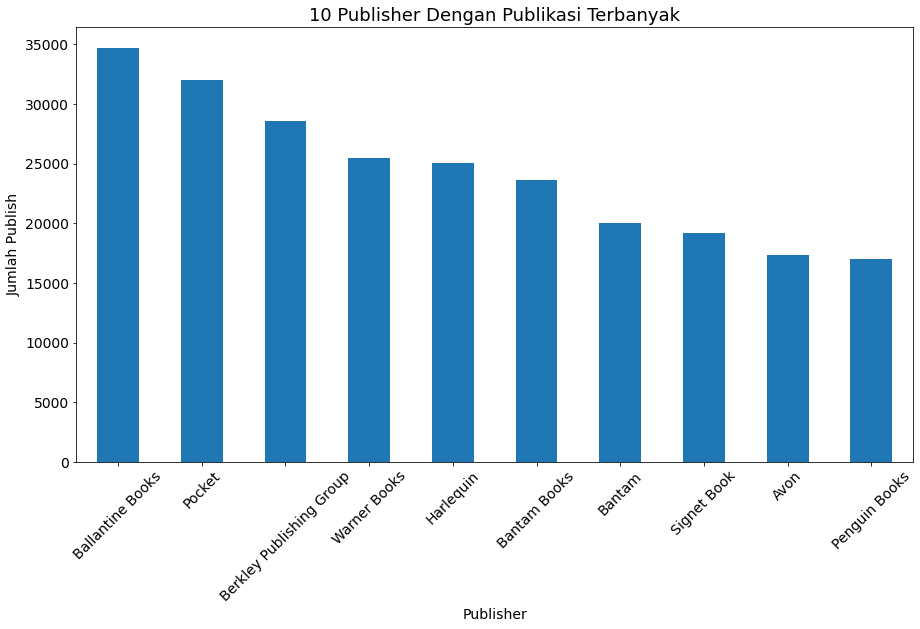

In [ ]:
#Publisher yang paling banyak mempublikasi
plt.figure(figsize=(15,8))
df['Publisher'].value_counts().iloc[:10].plot(kind='bar')
plt.xlabel("Publisher", size=14)
plt.xticks(rotation=45,fontsize=14)
plt.ylabel("Jumlah Publish", size=14)
plt.yticks(fontsize=14)
plt.title("10 Publisher Dengan Publikasi Terbanyak", size=18)
plt.show()

In [ ]:
#rata rata rating book tiap publisher
df.groupby(['Publisher'])[['Book-Rating']].agg('mean').sort_values(by='Book-Rating',ascending=False).iloc[:10]

Book-Rating
Publisher                                             
 Editions P. Terrail                              10.0
World Class Pubns                                 10.0
Institute for Food and Development Policy         10.0
T.A. Williams                                     10.0
Instructor Books                                  10.0
AuthorsOmniscient Publishers                      10.0
Szwede Slavic Books                               10.0
Interscience                                      10.0
Interstate Publishers                             10.0
Interstellar Publishing Company                   10.0

Dari 10 publisher terbanyak yang mempublikasi buku, Ballatine books adalah publisher terbanyak tetapi rating bukunya tidak masuk kedalam 10 besar rating buku terbaik.

In [ ]:
#rata rata rating book tiap publisher
df.groupby(['Book-Author'])[['Book-Rating']].agg('mean').sort_values(by='Book-Rating',ascending=False).iloc[:10]

Book-Rating
Book-Author                      
Harold Tietjens              10.0
Justin Gustainis             10.0
Letha, Booth                 10.0
Vegan Society                10.0
Myra Chanin                  10.0
Myra Cohn Livingston         10.0
Erica De Mane                10.0
McKenzie Kate                10.0
Justin McCory Martin         10.0
Myra Kornfeld                10.0

top 10 penulis buku dengan rata rata rating buku tertinggi adalah Harold Tietjens,Justin Gustainis, Letha Booth, Vegan society,Myra Chainin, Myra Chanin, Myra Cohn Livingston Erica De Mane McKenzie Kate, Justin McCory Martin dan Myra Kornfel tetapi jumah publikasi mereka tidak masuk dalam 10 besar dalam jumlah publikasi terbanyak.

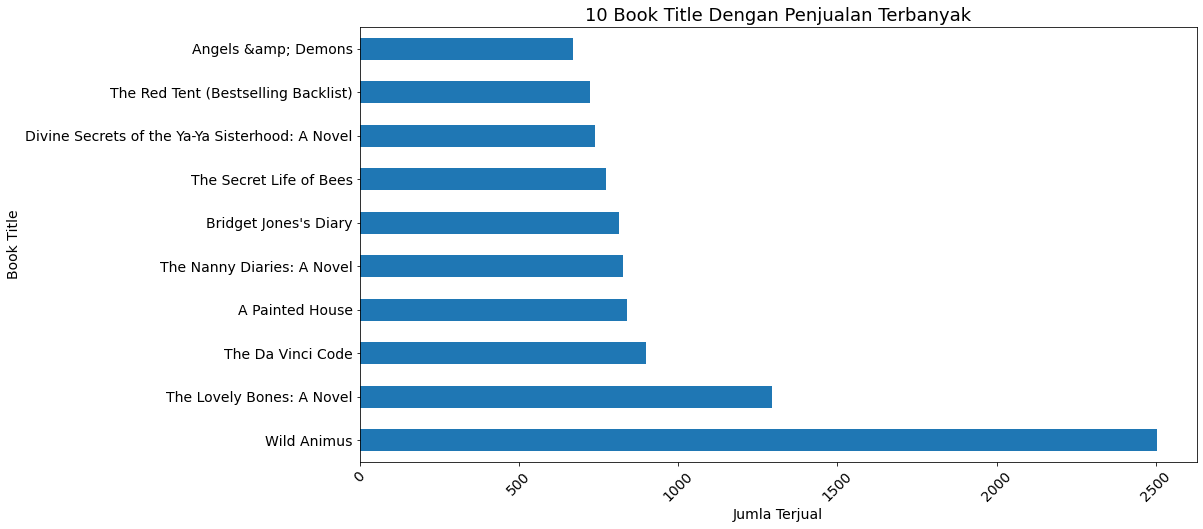

In [ ]:
# 10 Judul buku dengan penjualan terbanyak
plt.figure(figsize=(15,8))
df['Book-Title'].value_counts().sort_values(ascending=False).iloc[:10].plot(kind='barh')
plt.xlabel("Jumla Terjual", size=14)
plt.xticks(rotation=45,fontsize=14)
plt.ylabel("Book Title", size=14)
plt.yticks(fontsize=14)
plt.title("10 Book Title Dengan Penjualan Terbanyak", size=18)
plt.show()

Buku dengan judul Wild Animus adalah buku dengan penjualan terbanyak disusul dengan The Lovely Bones: A Novel

#Rokomendation Berdasarkan Publisher

In [ ]:
def recommend_books_on_publisher(x):
  a = df[df['Publisher']==x][['Book-Title','Book-Rating']]
  a = a.sort_values(by = 'Book-Rating',ascending=False)
  return a.head(10)

In [ ]:
recommend_books_on_publisher('Avon')

Book-Title  Book-Rating
664895                     A Secret Love (Cynster Novels)           10
46640                            The Flame and the Flower           10
43956                                        Subterranean           10
789004                                 The Enchanted Land           10
641730  All That Remains (Kay Scarpetta Mysteries (Pap...           10
504923                                            Christy           10
77667                               It's Always Something           10
406205                                         Neverwhere           10
787553          Wessex Papers #2: Fallout (Wessex Papers)           10
237193                                      Cryptonomicon           10

In [ ]:
@interact
def recommend_books_on_publisher(publisher_name = list(df['Publisher'].value_counts().index)):
  a = df[df['Publisher']==publisher_name][['Book-Title','Book-Rating']]
  a = a.sort_values(by = 'Book-Rating',ascending=False)
  return a.head(10)

interactive(children=(Dropdown(description='publisher_name', options=('Ballantine Books', 'Pocket', 'Berkley P…

#Rokemndation Berdasarkan Author

In [ ]:
@interact
def recommend_books_on_author(author_name = list(df['Book-Author'].value_counts().index)):
  a = df[df['Book-Author']==author_name][['Book-Title','Book-Rating']]
  a = a.sort_values(by = 'Book-Rating',ascending=False)
  return a.head(10)

interactive(children=(Dropdown(description='author_name', options=('Stephen King', 'Nora Roberts', 'John Grish…

#Rekomendation Sistem K-NN

## Preprocessing

In [ ]:
#konversi book rating menjadi bentuk kategoric
def num_into_obj(x):
  if x>=0 and x<=2:
    return 'between 0 and 2'
  elif x>=3 and x<=5:
    return 'between 3 and 5'
  elif x>=6 and x<=8:
    return 'between 6 and 8'
  elif x>=9 and x<=10:
    return 'between 9 and 10'

df['rating_obj'] = df['Book-Rating'].apply(num_into_obj)

In [ ]:
#encode categorical column
rating_df = pd.get_dummies(df['rating_obj'])
rating_df

between 0 and 2  between 3 and 5  between 6 and 8  between 9 and 10
0                      1                0                0                 0
1                      0                1                0                 0
2                      1                0                0                 0
3                      1                0                0                 0
4                      1                0                0                 0
...                  ...              ...              ...               ...
1031131                0                0                1                 0
1031132                1                0                0                 0
1031133                0                0                1                 0
1031134                1                0                0                 0
1031135                0                0                1                 0

[1031136 rows x 4 columns]

In [ ]:
#concat 3 kolom rating_df,book titel, book rating
feature = pd.concat([rating_df,df['Book-Rating'],df['Book-Title']],axis=1)
feature.set_index('Book-Title',inplace=True)
feature

between 0 and 2  ...  Book-Rating
Book-Title                                                           ...             
Classical Mythology                                               1  ...            0
Clara Callan                                                      0  ...            5
Decision in Normandy                                              1  ...            0
Flu: The Story of the Great Influenza Pandemic ...                1  ...            0
The Mummies of Urumchi                                            1  ...            0
...                                                             ...  ...          ...
Kat Scratch Fever (Kat Colorado Mysteries)                        0  ...            7
The Cat Who Ate Danish Modern (Cat Who... (Pape...                1  ...            0
In Her Day                                                        0  ...            6
Wicked Fix : A Home Repair is Homicide Mystery ...                1  ...            0
Ashes to Ashes                                                    0  ...            8

[1031136 rows x 5 columns]

In [ ]:
#scalling data frame
min_max_scaler = MinMaxScaler()
feature_scale = min_max_scaler.fit_transform(feature)
feature_scale

array([[1. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0.5],
       [1. , 0. , 0. , 0. , 0. ],
       ...,
       [0. , 0. , 1. , 0. , 0.6],
       [1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0.8]])

##Model

In [ ]:
#membangun model
model = neighbors.NearestNeighbors(n_neighbors=6,algorithm='brute',metric='cosine')
model.fit(feature_scale)
dist, idlist = model.kneighbors(feature_scale)

In [ ]:
def book_recommender(book_name=list(df['Book-Title'].value_counts().index)):
  book_list_name = []
  book_id = df[df['Book-Title']==book_name].index
  book_id = book_id[0]
  for newid in idlist[book_id]:
    book_list_name.append(df.loc[newid]['Book-Title'])
  return book_list_name

In [ ]:
book_recommender("There's a Bat in Bunk Five")

['The Cat Who Blew the Whistle',
 'Daughter of the Swan',
 'Strega',
 'The Cat Who Sang for the Birds (Cat Who... (Paperback))',
 'The Truce at Bakura (Star Wars)',
 "The Cat Who Wasn't There"]